#Clustering Assignment

##Assignment Questions



### Theoretical Questions:

#1. What is unsupervised learning in the context of machine learning?

Answer: Unsupervised learning is a class of machine learning methods that work with unlabeled data — that is, datasets where the target labels are not provided. The algorithm’s goal is to discover the underlying structure, relationships, or distribution patterns in the data without supervision. Typical unsupervised tasks include clustering (grouping observations by similarity), dimensionality reduction (compressing features while preserving structure), density estimation, and anomaly detection. Because no labels guide the model, evaluation often relies on internal metrics (silhouette, inertia) or external validation if ground truth becomes available later. Unsupervised methods are widely used for exploratory data analysis, preprocessing, feature engineering, and discovering latent classes or components. They are valuable when label acquisition is expensive or infeasible, and they often serve as a first step before supervised learning. Robustness to scaling and careful feature choice are important because unsupervised models rely directly on the input geometry.



---



#2. How does K-Means clustering algorithm work?

Answer: K-Means is an iterative centroid-based clustering algorithm that partitions N samples into K clusters. Initialization selects K centroids (randomly or via K-Means++), then the algorithm alternates two steps: assignment and update. In the assignment step, each data point is assigned to the nearest centroid according to a distance metric (commonly Euclidean). In the update step, each centroid is recomputed as the mean of points assigned to it. These steps repeat until convergence — when assignments no longer change or centroids move below a threshold. The algorithm aims to minimize within-cluster sum of squared distances (inertia). K-Means is simple and efficient for spherical, similarly sized clusters but can struggle with non-convex shapes, varying densities, and outliers. Choosing K is non-trivial and is often guided by domain knowledge, elbow method, or silhouette analysis.
                                     



---



#3. Explain the concept of a dendrogram in hierarchical clustering?

Answer: A dendrogram is a tree-like visual representation of hierarchical clustering results showing how individual samples are nested into clusters. In agglomerative (bottom-up) clustering, each sample starts as its own cluster; the dendrogram records successive merges: at each step, the two closest clusters are merged according to some linkage criterion, and a branch is drawn at the linkage height reflecting their distance. The vertical axis typically represents the distance or dissimilarity at which clusters merged. Dendrograms allow visual inspection of cluster structure at all scales and help decide an appropriate number of clusters by cutting the tree horizontally at a chosen height. They are especially useful when cluster hierarchy or nested groupings are of interest. However, dendrograms can be computationally expensive for very large datasets and less interpretable when the number of samples becomes large.



---



#4. What is the main difference between K-Means and Hierarchical Clustering?

Answer: The central difference is that K-Means is a flat partitioning method that produces K clusters all at once (after iterative refinement), whereas hierarchical clustering builds a nested set of partitions represented as a dendrogram. K-Means requires specifying K in advance, while hierarchical clustering does not — you can decide the cut level after building the tree. Computationally, K-Means scales well to large datasets but assumes spherical clusters and uses centroid updates; hierarchical clustering can capture arbitrary shapes and cluster hierarchies but is more expensive (especially naive implementations). K-Means is non-deterministic unless initialization is controlled; hierarchical clustering is deterministic given a linkage and distance metric. In short, use K-Means for scalability and spherical clusters; use hierarchical clustering for nested structure and interpretability.



---



#5. What are the advantages of DBSCAN over K-Means?

Answer: DBSCAN (Density-Based Spatial Clustering of Applications with Noise) has multiple advantages versus K-Means: it can find clusters of arbitrary shape (not limited to spherical clusters), it identifies noise/outlier points explicitly (labels them as noise), and it does not require specifying the number of clusters a priori. DBSCAN is robust to clusters with irregular geometry and varying orientation; it groups points based on local density using two parameters (ε radius and min_samples). For datasets with well-separated dense areas, DBSCAN excels where K-Means would fail or require many clusters. However, DBSCAN is sensitive to its density parameters and struggles with varying densities; K-Means remains stronger for large, spherical, similarly sized clusters.



---



#6. When would you use Silhouette Score in clustering?

Answer: Silhouette Score is used to evaluate clustering quality when you want a per-sample measure of cluster cohesion vs. separation without external labels. For each sample it computes a = mean intra-cluster distance and b = mean nearest-cluster distance; silhouette = (b − a) / max(a, b), ranging from −1 to 1. Use it to compare different clustering solutions (different K, different algorithms) and to select model parameters — higher average silhouette suggests better separation and compactness. It is particularly useful for mid-size datasets where pairwise distances are affordable. However, silhouette may be misleading when clusters have different densities or non-convex shapes; it also compresses complex geometry into a single number, so pairwise inspection and visual checks (e.g., t-SNE) complement it.



---



#7. What are the limitations of Hierarchical Clustering?

Answer: Hierarchical clustering’s main limitations include computational cost and sensitivity to noise/outliers: naive agglomerative implementations scale O(N²) in memory and O(N³) in runtime, making them impractical for large datasets. Once clusters are merged (in agglomerative methods), merges cannot be undone — so early mistakes propagate (greedy merging). It also requires choosing a linkage criterion (single, complete, average, ward), and different linkage choices can produce very different hierarchies. Hierarchical clustering works poorly on noisy data and high-dimensional spaces unless features are reduced. Lastly, dendrogram readability suffers with many samples. For large-scale tasks, approximate or specialized hierarchical algorithms, or pre-clustering, are often necessary.




---



#8. Why is feature scaling important in clustering algorithms like K-Means?

Answer: Feature scaling ensures that each feature contributes proportionately to distance computations used by K-Means. K-Means relies on Euclidean distances: unscaled features with larger numeric ranges will dominate distance and centroid calculations, skewing cluster formation. Standardization (z-score) or normalization (min-max) makes features comparable and avoids bias toward high-magnitude attributes. Scaling also speeds up convergence and often yields more meaningful clusters. When features are measured in different units (e.g., age in years vs income in rupees), scaling is mandatory. For algorithms like DBSCAN, scaling affects ε selection as well, so consistent preprocessing is essential across clustering methods.



---



#9. How does DBSCAN identify noise points?

Answer: DBSCAN labels a point as noise (an outlier) when it does not belong to any dense region as defined by the algorithm’s parameters. The algorithm defines a point as a core point if its ε-neighborhood contains at least min_samples points. A point is a border point if it is not a core point but lies within the ε-neighborhood of a core point. Any point that is neither core nor border is labeled noise. In practice, noise points are isolated low-density points that do not satisfy the minimum samples density requirement. This explicit noise detection is a major advantage of DBSCAN for outlier discovery. The identification depends on ε and min_samples; inappropriate values may over- or under-identify noise.



---



#10. Define inertia in the context of K-Means?

Answer: Inertia (also called within-cluster sum of squares, WCSS) is the sum of squared distances between each sample and the centroid of the cluster it belongs to. Formally, inertia = Σ_i ‖x_i − μ_{cluster(i)}‖². K-Means optimizes centroids to minimize inertia; lower inertia indicates tighter clusters around centroids. However, inertia is monotonically decreasing with K (more clusters → lower inertia), so it cannot be used alone to select K without penalties for complexity. The elbow method inspects inertia vs K to find diminishing returns. Inertia is sensitive to feature scaling and outliers and assumes Euclidean geometry; thus complementary metrics (silhouette, BIC/AIC-style criteria) are often used.



---



#11. What is the elbow method in K-Means clustering?

Answer: The elbow method is a heuristic for selecting the number of clusters K in K-Means. You run K-Means for a range of K values and plot inertia (WCSS) vs K. Initially, inertia drops rapidly as K increases; once K becomes large enough to capture true structure, the reduction rate slows. The “elbow” point — where the plot bends and the marginal gain falls — suggests a good K trade-off between fit and parsimony. The elbow is subjective and can be ambiguous if the curve is smooth without a clear bend. Complementing elbow with silhouette scores, domain knowledge, or stability analysis yields better K selection.



---



#12. Describe the concept of "density" in DBSCAN?

Answer: In DBSCAN, density is defined locally as the number of points within an ε radius neighborhood around a point. A point is considered part of a dense region if its ε-neighborhood contains at least min_samples points. Dense regions correspond to clusters: connectivity of core points whose neighborhoods overlap forms a cluster. Density differs from geometric proximity — it captures both distance and local concentration of points. DBSCAN’s notion of density allows it to identify non-spherical clusters and to separate dense clusters from sparse noise. However, a single global density threshold may not suit data with variable local densities.



---



#13. Can hierarchical clustering be used on categorical data?

Answer: Yes — hierarchical clustering can be applied to categorical data provided you define an appropriate dissimilarity or distance measure between samples. For categorical variables you can use Hamming distance, Jaccard distance (for binary attributes), or more general distance metrics built from contingency tables or encoding schemes. Some approaches convert categorical variables into numerical encodings (one-hot) and use distance metrics suited to binary vectors, but beware of the curse of dimensionality. Another approach is to use specialized clustering methods for categorical data (e.g., k-modes) or mixed-data dissimilarities (Gower distance) before hierarchical linkage. The key is choosing a similarity/dissimilarity that respects the categorical semantics.




---



#14. What does a negative Silhouette Score indicate?

Answer: A negative silhouette score for a sample (silhouette < 0) indicates that the sample is, on average, closer to points in a neighboring cluster than to points in its own cluster. This suggests likely misclassification or that the clustering assignment is poor for that sample. At the cluster or global level, a negative average silhouette indicates that clusters overlap heavily, the clustering solution may be wrong (e.g., incorrect K or method), or there’s no clear cluster structure. Inspecting negative silhouette samples can reveal boundary points, mislabeled data, or the need for a different clustering model or preprocessing.



---



#15. Explain the term "linkage criteria" in hierarchical clustering?

Answer: Linkage criteria determine how the distance between clusters is measured when performing hierarchical (agglomerative) clustering. Common linkage methods include: Single linkage (minimum pairwise distance between cluster points), Complete linkage (maximum pairwise distance), Average linkage (average pairwise distance), and Ward’s linkage (minimizes variance increase within clusters). The chosen linkage affects cluster shapes and the dendrogram: single linkage tends to produce elongated, chain-like clusters and is sensitive to noise; complete linkage prefers compact clusters; Ward favors clusters that minimize within-cluster variance and often yields spherical clusters. Linkage choice should reflect the desired cluster geometry and robustness trade-offs.



---



#16. Why might K-Means clustering perform poorly on data with varying cluster sizes or densities?

Answer: K-Means assumes clusters are roughly spherical and of comparable size because it assigns points to the nearest centroid and uses mean positions as cluster prototypes. When cluster sizes or densities vary, centroids may be pulled toward larger clusters, small dense clusters may be misassigned, and K-Means may split large clusters or merge small ones incorrectly. K-Means also lacks a natural mechanism to identify noise, so outliers can distort centroids. For clusters with complex shapes, varying density, or highly non-uniform sizes, density-based methods (DBSCAN) or hierarchical clustering are often more appropriate.



---



#17. What are the core parameters in DBSCAN, and how do they influence clustering?

Answer: DBSCAN’s core parameters are ε (eps) and min_samples. Eps defines the radius of the neighborhood used to count nearby points; min_samples is the minimum number of points (including the point itself) required to form a dense region. Together, they determine whether a point is a core, border, or noise point. Large eps tends to produce larger, possibly merged clusters and fewer noise points; small eps fragments clusters and increases noise. Larger min_samples requires denser regions to form clusters and hence can reduce spurious small clusters. Parameter choice is data-dependent; common heuristics include k-distance plots (k = min_samples) to find an appropriate eps.



---



#18. How does K-Means++ improve upon standard K-Means initialization?

Answer: K-Means++ provides a smarter initialization for centroids to improve convergence and final clustering quality. Instead of random initialization that can produce poor starting centroids, K-Means++ chooses one random centroid, then selects subsequent centroids probabilistically weighted by squared distance from the nearest existing centroid (D² weighting). This spreads initial centroids across the data, reducing the likelihood of empty clusters and poor local minima, and typically yields faster convergence and better final inertia. K-Means++ retains the low computational overhead but significantly improves stability of results compared to naive random starts.



---



#19. What is agglomerative clustering?

Answer: Agglomerative clustering is a hierarchical bottom-up clustering method: each point starts as its own cluster and the algorithm iteratively merges the two clusters that are closest according to a linkage criterion, forming larger clusters until a single cluster remains or a stopping condition is met. The process records each merge and produces a dendrogram that shows the clustering structure at all scales. Agglomerative methods are flexible in choosing distance metrics and linkage, which affects cluster shapes and resolution. They are useful when hierarchical relationships are important or when no pre-specified K is available. However, agglomerative clustering can be computationally expensive and sensitive to early merge decisions.



---



#20. What makes Silhouette Score a better metric than just inertia for model evaluation?

Answer: Silhouette Score measures both intra-cluster cohesion and inter-cluster separation for each sample and returns an average across samples. Inertia (WCSS) only measures compactness (sum of squared distances to centroids) and monotonically decreases with more clusters, so it cannot penalize over-segmentation. Silhouette compares how similar a point is to its own cluster relative to the next best cluster, providing interpretable values between −1 and +1. It helps detect poorly separated clusters, overlapping clusters, and misassignments, which inertia does not. Therefore silhouette gives a more balanced view of clustering quality, especially when clusters differ in shape and size. That said, silhouette has limitations (sensitivity to cluster geometry), so it’s best used with other diagnostics.


### Practical Questions:

##Q21) Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a scatter plot.



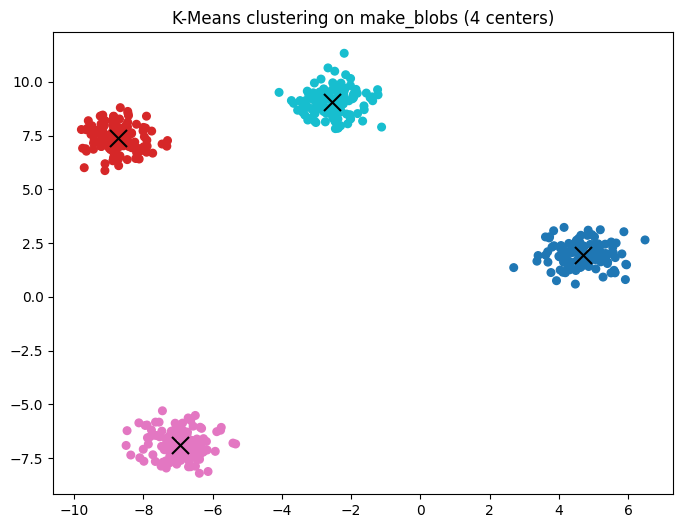

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=labels, cmap='tab10', s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', s=150, marker='x')
plt.title("K-Means clustering on make_blobs (4 centers)")
plt.show()

##Q22)  Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

iris = load_iris()
X_iris = iris.data
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
pred_labels = agg.fit_predict(X_iris)
print(pred_labels[:10])

[1 1 1 1 1 1 1 1 1 1]


##Q23)  Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.


/tmp/ipython-input-3229150800.py:19: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_moons[mask,0], X_moons[mask,1], s=30, cmap='tab10')


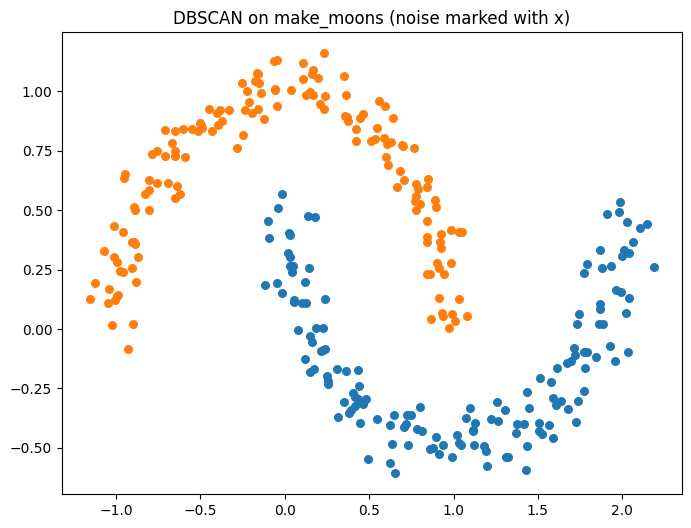

In [3]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import numpy as np

X_moons, y_moons = make_moons(n_samples=300, noise=0.07, random_state=42)
db = DBSCAN(eps=0.2, min_samples=5)
db_labels = db.fit_predict(X_moons)
outliers_mask = db_labels == -1

plt.figure(figsize=(8,6))
# plot clusters
unique_labels = set(db_labels)
colors = [plt.cm.tab10(i) for i in range(len(unique_labels))]
for lbl in unique_labels:
    mask = db_labels == lbl
    if lbl == -1:
        plt.scatter(X_moons[mask,0], X_moons[mask,1], c='k', marker='x', label='noise')
    else:
        plt.scatter(X_moons[mask,0], X_moons[mask,1], s=30, cmap='tab10')
plt.title("DBSCAN on make_moons (noise marked with x)")
plt.show()

##Q24)  Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each cluster.

In [4]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X_wine = wine.data
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

kmeans_wine = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_wine = kmeans_wine.fit_predict(X_wine_scaled)
unique, counts = np.unique(labels_wine, return_counts=True)
print(dict(zip(unique, counts)))

{np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


## Q25) Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.

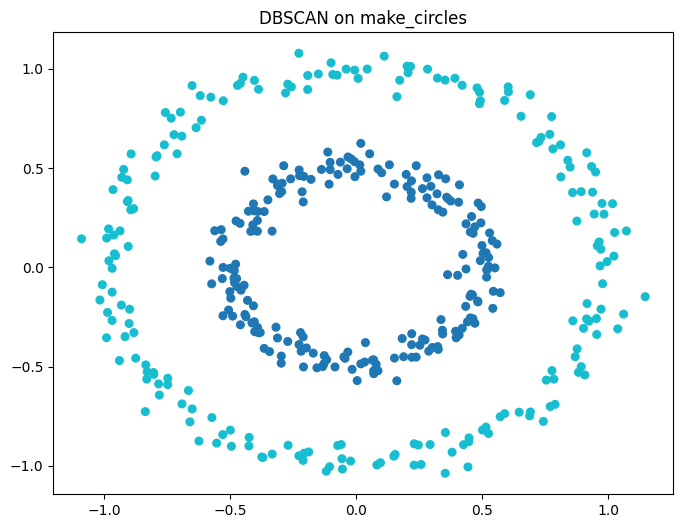

In [5]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

X_circ, y_circ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)
db_circ = DBSCAN(eps=0.15, min_samples=4)
labels_circ = db_circ.fit_predict(X_circ)

plt.figure(figsize=(8,6))
plt.scatter(X_circ[:,0], X_circ[:,1], c=labels_circ, cmap='tab10', s=30)
plt.title("DBSCAN on make_circles")
plt.show()

##Q26) Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster centroids.

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

bc = load_breast_cancer()
X_bc = bc.data
sc = MinMaxScaler()
X_bc_scaled = sc.fit_transform(X_bc)

km_bc = KMeans(n_clusters=2, random_state=42, n_init=10)
km_bc.fit(X_bc_scaled)
print("Centroids:\n", km_bc.cluster_centers_)

Centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


##Q27) Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.

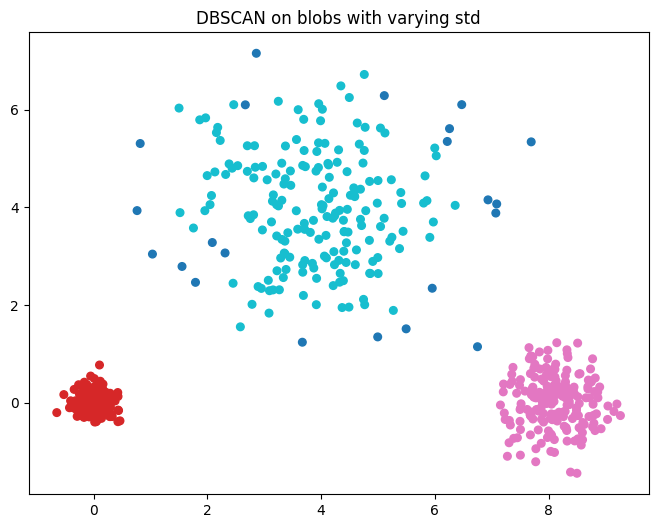

In [7]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

X_var, _ = make_blobs(n_samples=600, centers=[[0,0],[4,4],[8,0]], cluster_std=[0.2, 1.2, 0.5], random_state=42)
db_var = DBSCAN(eps=0.6, min_samples=6)
labels_var = db_var.fit_predict(X_var)

plt.figure(figsize=(8,6))
plt.scatter(X_var[:,0], X_var[:,1], c=labels_var, cmap='tab10', s=30)
plt.title("DBSCAN on blobs with varying std")
plt.show()

##Q28) Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means.

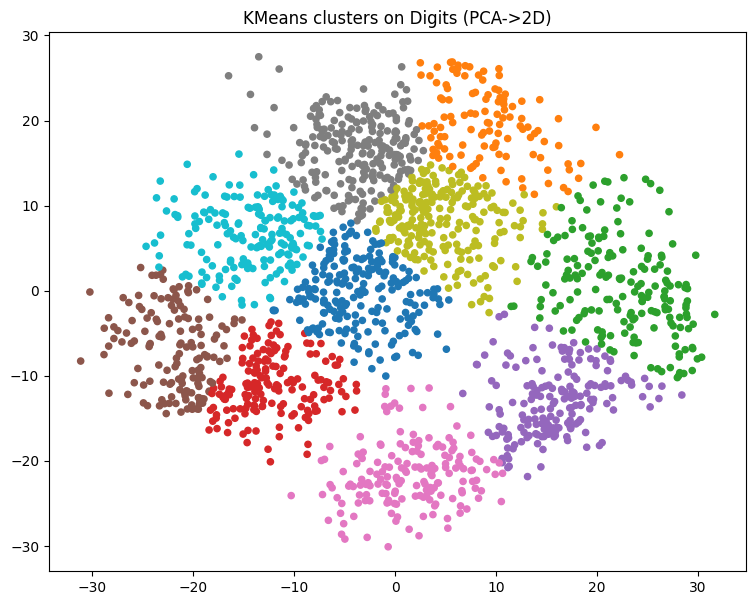

In [8]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

digits = load_digits()
X_digits = digits.data
pca = PCA(n_components=2, random_state=42)
X_digits_2d = pca.fit_transform(X_digits)

kmd = KMeans(n_clusters=10, random_state=42, n_init=10)
d_labels = kmd.fit_predict(X_digits_2d)

plt.figure(figsize=(9,7))
plt.scatter(X_digits_2d[:,0], X_digits_2d[:,1], c=d_labels, cmap='tab10', s=20)
plt.title("KMeans clusters on Digits (PCA->2D)")
plt.show()

##Q29) Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.

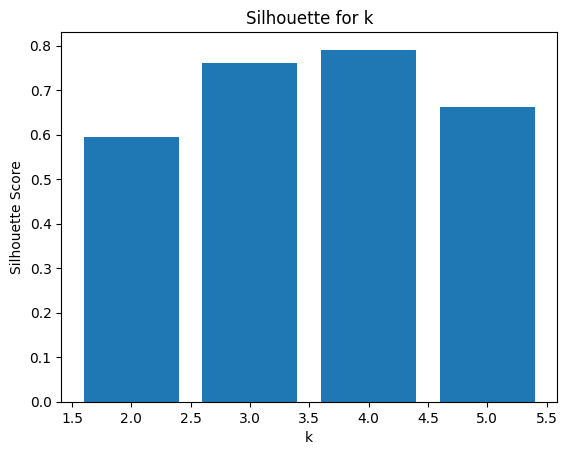

In [9]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X_sb, _ = make_blobs(n_samples=500, centers=4, random_state=42)
sil_scores = []
ks = [2,3,4,5]
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_sb)
    sil = silhouette_score(X_sb, labels)
    sil_scores.append(sil)

plt.bar(ks, sil_scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette for k")
plt.show()

##Q30)  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.

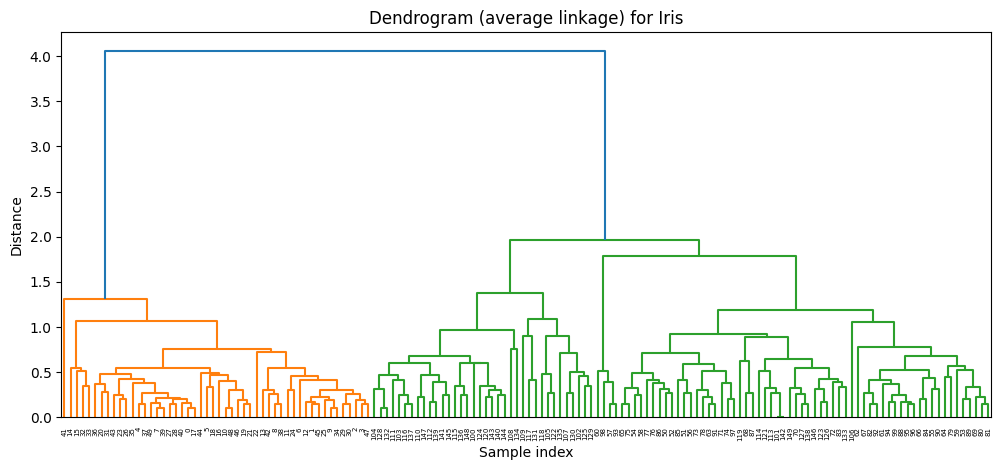

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
Z = linkage(X, method='average')
plt.figure(figsize=(12,5))
dendrogram(Z, truncate_mode=None)
plt.title("Dendrogram (average linkage) for Iris")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

##Q31) Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with decision boundaries.

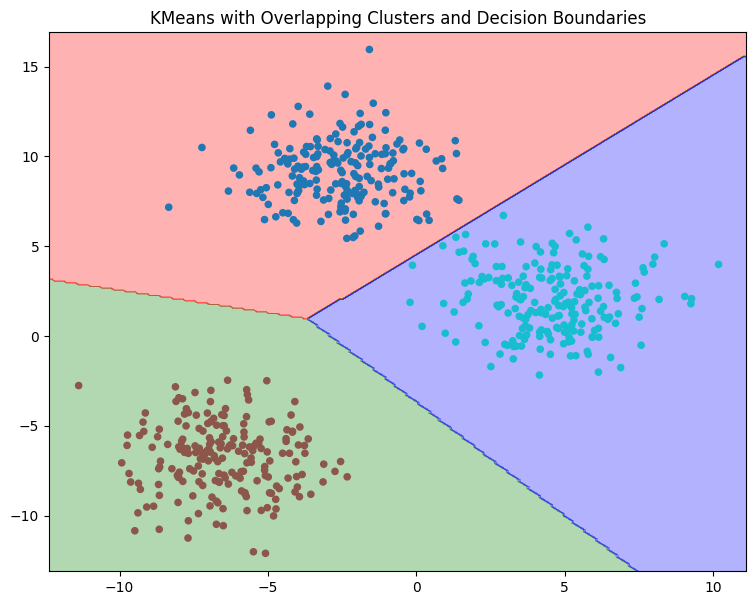

In [11]:
from sklearn.datasets import make_blobs
import numpy as np
from matplotlib.colors import ListedColormap

X_ov, y_ov = make_blobs(n_samples=600, centers=3, cluster_std=1.8, random_state=42)
km_ov = KMeans(n_clusters=3, random_state=42, n_init=10)
y_km_ov = km_ov.fit_predict(X_ov)

# Decision boundary (2D)
h = 0.1
x_min, x_max = X_ov[:,0].min()-1, X_ov[:,0].max()+1
y_min, y_max = X_ov[:,1].min()-1, X_ov[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))
Z = km_ov.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red','green','blue']))
plt.scatter(X_ov[:,0], X_ov[:,1], c=y_km_ov, cmap='tab10', s=20)
plt.title("KMeans with Overlapping Clusters and Decision Boundaries")
plt.show()

##Q32)  Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.

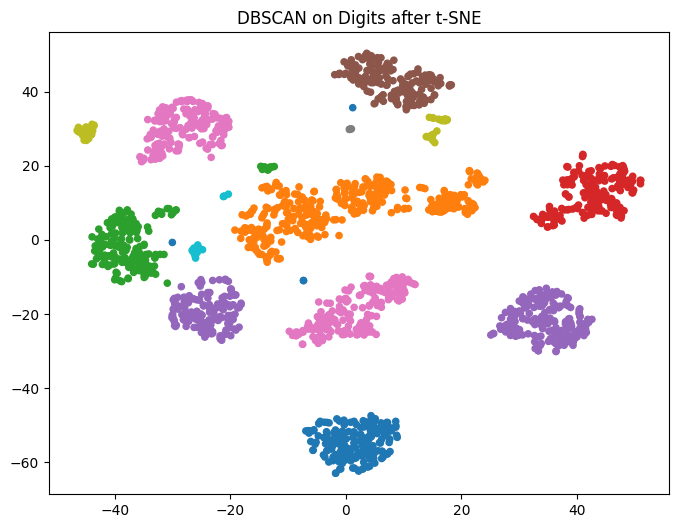

In [12]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_digits

digits = load_digits()
Xd = digits.data
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(Xd)
db_tsne = DBSCAN(eps=3.5, min_samples=4)
labels_tsne = db_tsne.fit_predict(X_tsne)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels_tsne, cmap='tab10', s=20)
plt.title("DBSCAN on Digits after t-SNE")
plt.show()

##Q33)  Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

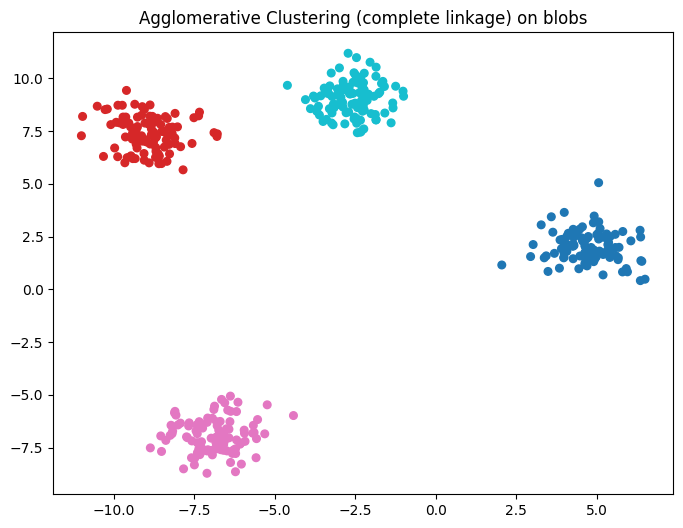

In [13]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X13, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.8, random_state=42)
agg_complete = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels13 = agg_complete.fit_predict(X13)

plt.figure(figsize=(8,6))
plt.scatter(X13[:,0], X13[:,1], c=labels13, cmap='tab10', s=30)
plt.title("Agglomerative Clustering (complete linkage) on blobs")
plt.show()

##Q34) Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a line plot.

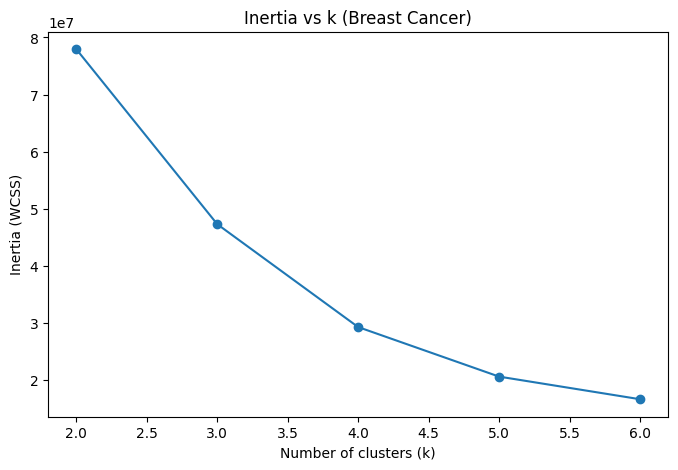

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data14 = load_breast_cancer()
X14 = data14.data

inertias = []
Ks = range(2,7)
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X14)
    inertias.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(list(Ks), inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Inertia vs k (Breast Cancer)")
plt.show()

##Q35) Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

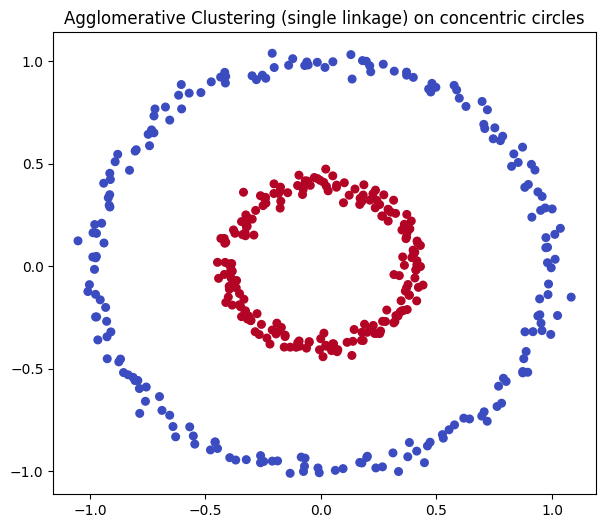

In [15]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X15, _ = make_circles(n_samples=400, factor=0.4, noise=0.03, random_state=42)
agg_single = AgglomerativeClustering(n_clusters=2, linkage='single')
labels15 = agg_single.fit_predict(X15)

plt.figure(figsize=(7,6))
plt.scatter(X15[:,0], X15[:,1], c=labels15, cmap='coolwarm', s=30)
plt.title("Agglomerative Clustering (single linkage) on concentric circles")
plt.show()

##Q36) Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

In [16]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X16 = wine.data
scaler = StandardScaler()
X16s = scaler.fit_transform(X16)

db16 = DBSCAN(eps=0.9, min_samples=5)
labels16 = db16.fit_predict(X16s)
n_clusters = len(set(labels16)) - (1 if -1 in labels16 else 0)
print("Number of clusters (excluding noise):", n_clusters)

Number of clusters (excluding noise): 0


##Q37)  Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.

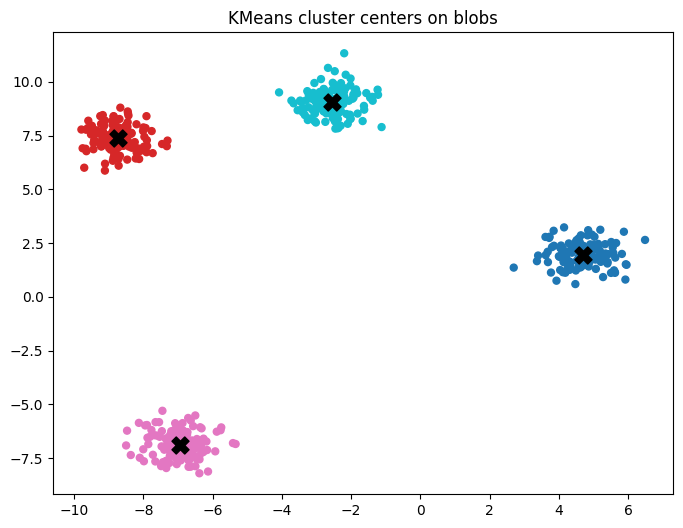

In [17]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X17, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=42)
km17 = KMeans(n_clusters=4, random_state=42, n_init=10)
labels17 = km17.fit_predict(X17)
centers17 = km17.cluster_centers_

plt.figure(figsize=(8,6))
plt.scatter(X17[:,0], X17[:,1], c=labels17, cmap='tab10', s=25)
plt.scatter(centers17[:,0], centers17[:,1], c='black', s=150, marker='X')
plt.title("KMeans cluster centers on blobs")
plt.show()

##Q38) Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.

In [18]:
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
import numpy as np

iris = load_iris()
X18 = iris.data
db18 = DBSCAN(eps=0.5, min_samples=5)
labels18 = db18.fit_predict(X18)
noise_count = np.sum(labels18 == -1)
print("Number of noise samples:", noise_count)

Number of noise samples: 17


##Q39) Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the clustering result.

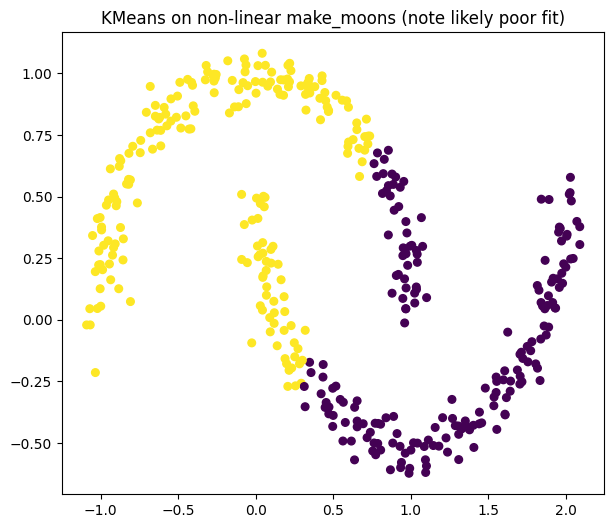

In [19]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X19, _ = make_moons(n_samples=400, noise=0.06, random_state=42)
km19 = KMeans(n_clusters=2, random_state=42, n_init=10)
labels19 = km19.fit_predict(X19)

plt.figure(figsize=(7,6))
plt.scatter(X19[:,0], X19[:,1], c=labels19, cmap='viridis', s=30)
plt.title("KMeans on non-linear make_moons (note likely poor fit)")
plt.show()

##Q40) Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

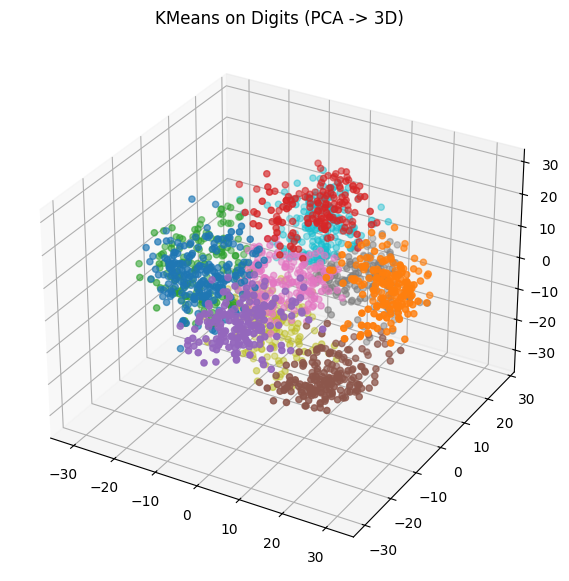

In [20]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
Xd = digits.data
pca20 = PCA(n_components=3, random_state=42)
Xd3 = pca20.fit_transform(Xd)

km20 = KMeans(n_clusters=10, random_state=42, n_init=10)
labels20 = km20.fit_predict(Xd3)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(Xd3[:,0], Xd3[:,1], Xd3[:,2], c=labels20, cmap='tab10', s=20)
ax.set_title("KMeans on Digits (PCA -> 3D)")
plt.show()

##Q41) Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X21, _ = make_blobs(n_samples=600, centers=5, cluster_std=0.6, random_state=42)
km21 = KMeans(n_clusters=5, random_state=42, n_init=10)
labels21 = km21.fit_predict(X21)
sil21 = silhouette_score(X21, labels21)
print("Silhouette Score (k=5):", sil21)

Silhouette Score (k=5): 0.7925452669805668


##Q42) Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.

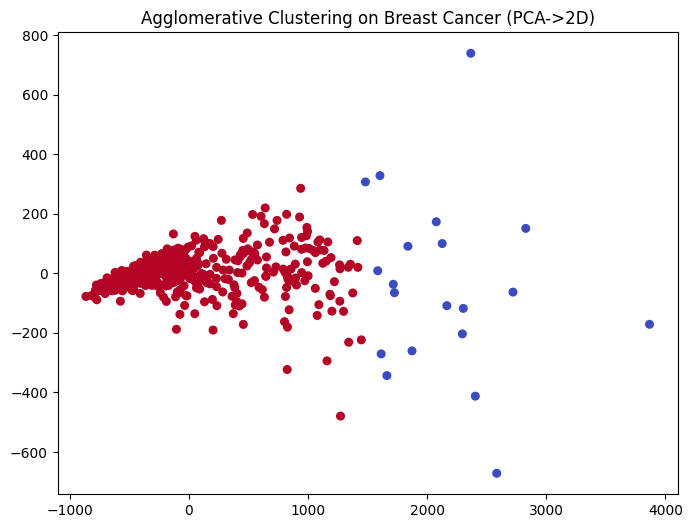

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

bc = load_breast_cancer()
X22 = bc.data
pca22 = PCA(n_components=2, random_state=42)
X22_2d = pca22.fit_transform(X22)

agg22 = AgglomerativeClustering(n_clusters=2, linkage='average')
labels22 = agg22.fit_predict(X22_2d)

plt.figure(figsize=(8,6))
plt.scatter(X22_2d[:,0], X22_2d[:,1], c=labels22, cmap='coolwarm', s=30)
plt.title("Agglomerative Clustering on Breast Cancer (PCA->2D)")
plt.show()

##Q43) Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.

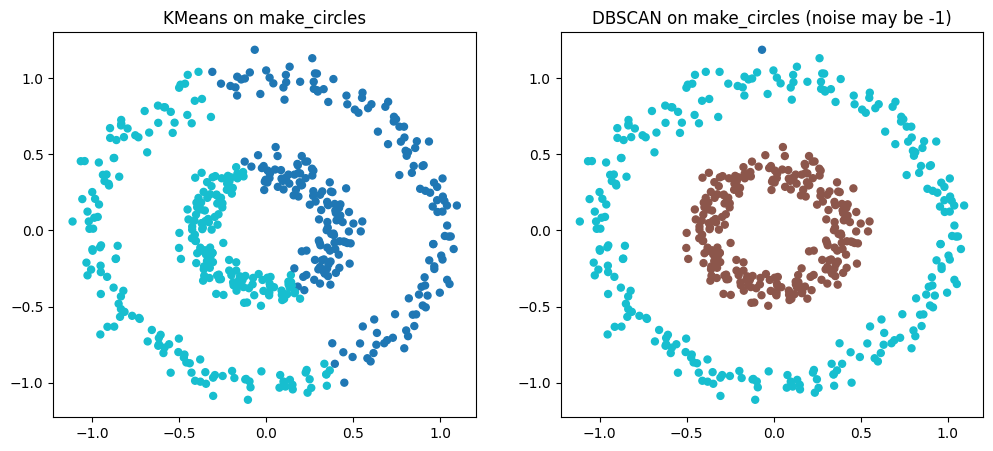

In [23]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X23, _ = make_circles(n_samples=500, factor=0.4, noise=0.06, random_state=42)
km23 = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(X23)
db23 = DBSCAN(eps=0.15, min_samples=5).fit_predict(X23)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(X23[:,0], X23[:,1], c=km23, cmap='tab10', s=25)
plt.title("KMeans on make_circles")

plt.subplot(1,2,2)
plt.scatter(X23[:,0], X23[:,1], c=db23, cmap='tab10', s=25)
plt.title("DBSCAN on make_circles (noise may be -1)")
plt.show()

##Q44) Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.

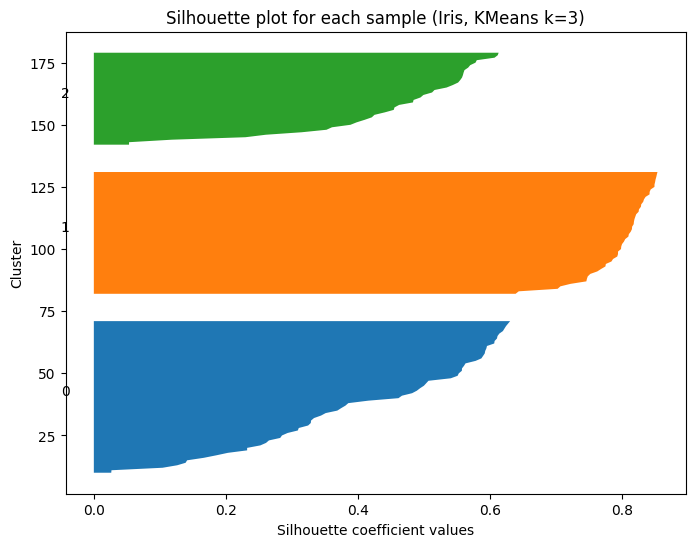

In [24]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X24 = iris.data
km24 = KMeans(n_clusters=3, random_state=42, n_init=10).fit_predict(X24)
sil_vals = silhouette_samples(X24, km24)

y_ticks = []
y_lower = 10
plt.figure(figsize=(8,6))
for i in range(3):
    ith_cluster_sil_vals = sil_vals[km24 == i]
    ith_cluster_sil_vals.sort()
    y_upper = y_lower + ith_cluster_sil_vals.shape[0]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_vals)
    plt.text(-0.05, y_lower + 0.5 * ith_cluster_sil_vals.shape[0], str(i))
    y_lower = y_upper + 10
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster")
plt.title("Silhouette plot for each sample (Iris, KMeans k=3)")
plt.show()

##Q45) Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.

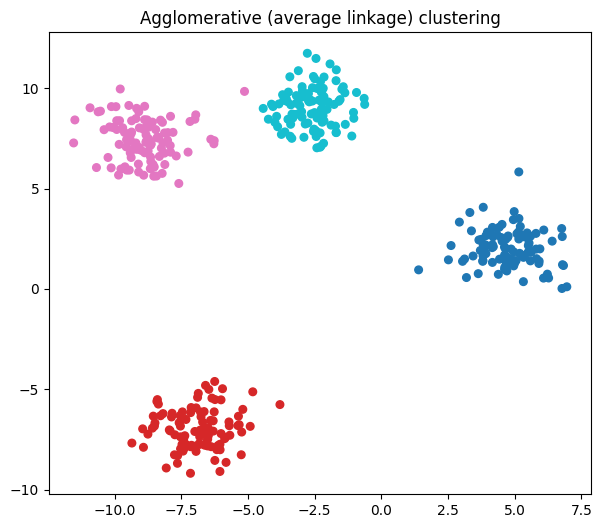

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X25, _ = make_blobs(n_samples=400, centers=4, random_state=42)
agg25 = AgglomerativeClustering(n_clusters=4, linkage='average')
labels25 = agg25.fit_predict(X25)

plt.figure(figsize=(7,6))
plt.scatter(X25[:,0], X25[:,1], c=labels25, cmap='tab10', s=30)
plt.title("Agglomerative (average linkage) clustering")
plt.show()

##Q46) Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).

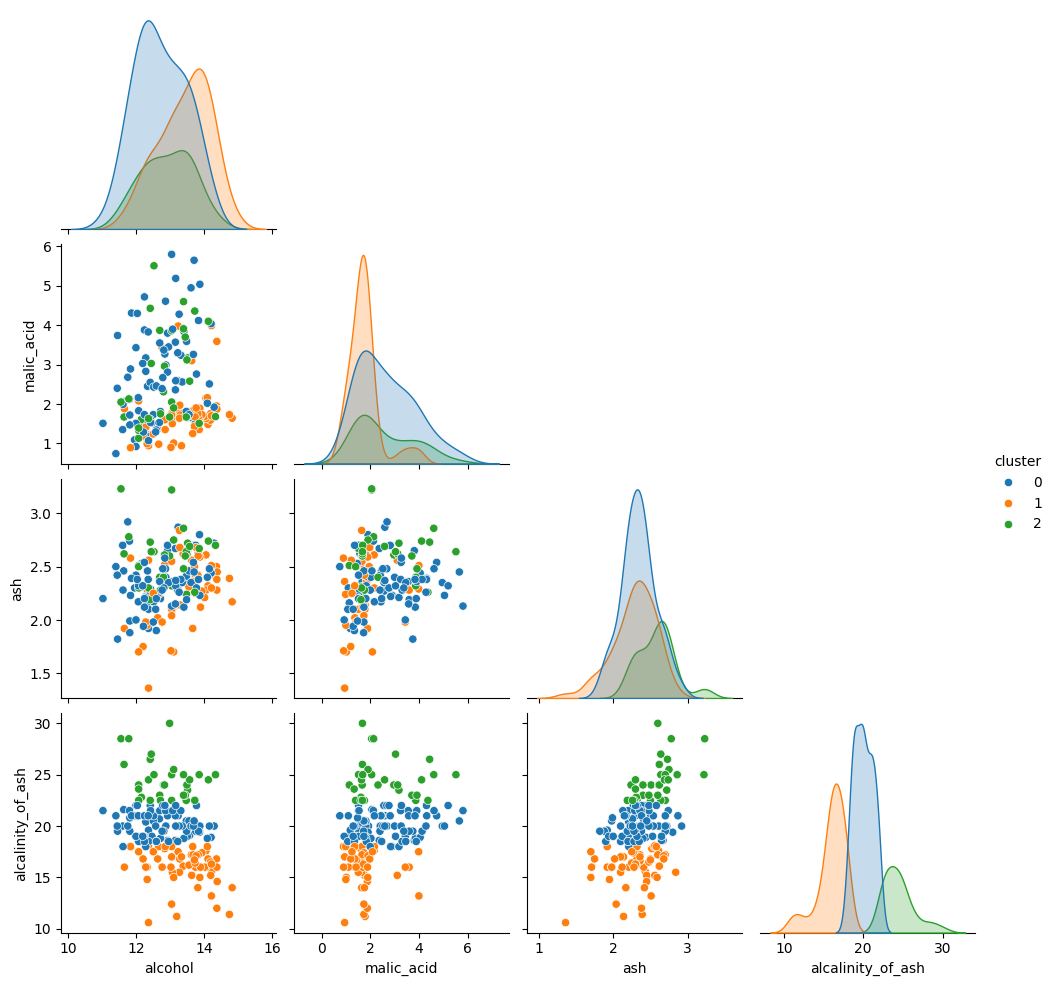

In [26]:
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

wine = load_wine()
df26 = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])
km26 = KMeans(n_clusters=3, random_state=42, n_init=10)
df26['cluster'] = km26.fit_predict(df26.values)

sns.pairplot(df26, hue='cluster', vars=wine.feature_names[:4], palette='tab10', corner=True)

##Q47)  Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.

In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X27, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.2, random_state=42)
# add random noise points
import numpy as np
rng = np.random.RandomState(42)
noise = rng.uniform(low=X27.min()-6, high=X27.max()+6, size=(50, X27.shape[1]))
X27b = np.vstack([X27, noise])

db27 = DBSCAN(eps=0.8, min_samples=6)
labels27 = db27.fit_predict(X27b)
n_noise = np.sum(labels27 == -1)
n_clusters = len(set(labels27)) - (1 if -1 in labels27 else 0)
print("Clusters found:", n_clusters, "Noise points:", n_noise)

Clusters found: 4 Noise points: 93


##Q48) Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

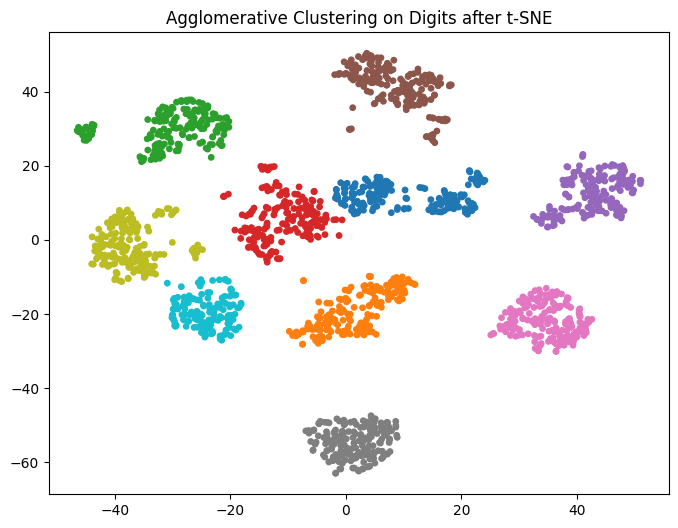

In [28]:
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
Xd = digits.data
X_tsne = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(Xd)
agg28 = AgglomerativeClustering(n_clusters=10, linkage='ward')
labels28 = agg28.fit_predict(X_tsne)

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=labels28, cmap='tab10', s=15)
plt.title("Agglomerative Clustering on Digits after t-SNE")
plt.show()